# Dokumen Terlampir

- Presentasi atau Submission Penugasan Task 5: [Task 5 VIX Data Engineer](https://docs.google.com/presentation/d/1ydDAr2b4sNEKOs4IbxA3B3bxYpx0_68Nzoo2Lki4c34/edit?usp=sharing)
- Google Drive Penugasan Task 5: [Google Drive](https://drive.google.com/drive/folders/1ikxB07JPbSANz-jM4a9rCnRp37HGgPDy?usp=sharing)

# Penjelasan Metode yang Digunakan
Dalam pengerjaan tugas ini, digunakan kerangka CRISP-DM karena kerangka ini searah dengan deskripsi dan pencapaian yang harus dicapai dalam pengerjaan tugas ini. CRISP-DM sendiri adalah metodologi umum yang digunakan untuk mengerjakan proyek data mining dan analisis prediktif. CRISP-DM terdiri dari enam fase: 
- Pemahaman bisnis (business understanding)
- Pemahaman data (data understanding)
- Persiapan data (data preparation)
- Pemodelan data (data modeling)
- Evaluasi (evaluation)
- Implementasi (deployment) <br>

Akan tetapi karena proyek ini hanya terbatas pada pemberian saran dan arahan, maka kerangka ini akan dilakukan hanya **hingga tahap evaluasi.**

# Business Understanding (Pemahaman Bisnis)
Dari dataset yang diberikan dan kasus yang telah dipaparkan melalui platform, dapat diasumsikan bahwa arah bisnis dari BTPN Syariah yang berkaitan dengan dataset adalah sebagai berikut,
- Mengidentifikasi faktor apa saja yang menjadi penyebab customer terlambat membayar tunggakan kredit.
- Mengidentifikasi faktor penyebab customer berhenti menggunakan layanan.
<br>

Dari poin-poin ini, muncul pula pertanyaan lagi sebagai berikut,
- "Bagaimana kriteria customer yang menunggak pembayaran kredit?"
- "Data mana saja yang berpengaruh terhadap berhentinya seorang customer dalam menggunakan layanan kartu kredit?"


#Data Understanding (Pemahaman Data)
## Tabel yang Digunakan
adapun ada lima tabel yang akan dijadikan sebagai patokan dalam pengolahan data pada proyek ini, antara lain:<br>
1) Customer_data_history: berisi riwayat pengguna kartu kredit beserta biodatanya secara sekilas. <br>
2) Category_db: berisi kategori jenis kartu yang digunakan oleh pengguna. <br>
3) Education_db: berisi kategori data atas pendidikan terakhir oleh pengguna. <br>
4) Marital_db: berisi kategori data atas status pernikahan dari pengguna.<br>
5) Status_db: berisi kategori dari pengguna apakah pengguna berhenti menggunakan layanan atau belum.


## Pendefinisian Data yang Ada di Business Understanding

Karena ada dua objektif bisnis yang diangkat, maka perlu adanya jawaban atas pertanyaan yang dihasilkan dari objektif-objektif bisnis tersebut. <br><br>
**Bagaimana kriteria customer yang menunggak pembayaran kredit?**
<br>Karena tidak adanya nilai pasti yang menggambarkan penunggakan yang terlambat, maka diasumsikan yang memiliki Avg_Utilization_Ratio di customer_data_history lebih dari 30%.<br><br>
**Data mana saja yang berpengaruh terhadap berhentinya seorang customer dalam menggunakan layanan kartu kredit?**
<br> Karena sudah diketahui customer mana saja yang berhenti menggunakan layanan secara jelas di tabel Status_db, maka perlu dilakukan EDA lebih lanjut terkait data tersebut.

# Data Preparation (Persiapan Data)

## Data and Library Importing
Digunakan untuk me-load data-data yang digunakan agar dapat digunakan dalam notebook

In [ ]:
## Digunakan untuk mengimpor data dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Digunakan untuk mengimpor library yang akan digunakan dalam pengolahan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Digunakan untuk Data Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
## Digunakan untuk Data Modeling
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
customer_data_history = pd.read_csv('/content/drive/MyDrive/Magang/VIX_BTPNS-DataEngineer/Dataset/CSV/customer_data_history.csv')
category_db = pd.read_csv('/content/drive/MyDrive/Magang/VIX_BTPNS-DataEngineer/Dataset/CSV/category_db.csv')
education_db = pd.read_csv('/content/drive/MyDrive/Magang/VIX_BTPNS-DataEngineer/Dataset/CSV/education_db.csv')
marital_db = pd.read_csv('/content/drive/MyDrive/Magang/VIX_BTPNS-DataEngineer/Dataset/CSV/marital_db.csv')
status_db = pd.read_csv('/content/drive/MyDrive/Magang/VIX_BTPNS-DataEngineer/Dataset/CSV/status_db.csv')

## Data Cleaning
Agar data yang digunakan menjadi lebih mudah diolah, dilakukan pembersihan data dari nilai NULL dan nilai yang duplikat.

In [ ]:
## Mencari tahu data yang bernilai NULL pada tiap tabel
df_info = [customer_data_history, category_db, education_db, marital_db, status_db]

for i in df_info:
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Educationid               10127 non-null  int64  
 6   Maritalid                 10127 non-null  int64  
 7   Income_Category           10127 non-null  object 
 8   card_categoryid           10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#Mencari data duplikat pada data customer
customer_data_history['CLIENTNUM'].isna().sum()

0

Karena data sudah tidak ada yang duplikat dan bernilai NULL, maka data dapat dikatakan sudah cukup bersih. 

## Data Merging
Untuk memudahkan proses pengolahan, tabel-tabel yang ada akan digabung menjadi satu tabel gabungan yang mencakup keseluruhan informasi

In [ ]:
df_temp = pd.merge(customer_data_history, category_db, how='inner', left_on='card_categoryid', right_on='id')
df_temp = pd.merge(df_temp, education_db, how='inner', left_on='Educationid', right_on='id')
df_temp = pd.merge(df_temp, marital_db, how='inner', left_on='Maritalid', right_on='id')
df_temp = pd.merge(df_temp, status_db, how='inner', left_on='idstatus', right_on='id')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Educationid               10127 non-null  int64  
 6   Maritalid                 10127 non-null  int64  
 7   Income_Category           10127 non-null  object 
 8   card_categoryid           10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<ipython-input-80-a830b29a6fde>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_temp = pd.merge(df_temp, status_db, how='inner', left_on='idstatus', right_on='id')


In [ ]:
df_temp.sample(20)

,CLIENTNUM,idstatus,Customer_Age,Gender,Dependent_count,Educationid,Maritalid,Income_Category,card_categoryid,Months_on_book,...,Total_Trans_Ct,Avg_Utilization_Ratio,id_x,Card_Category,id_y,Education_Level,id_x,Marital_Status,id_y,status
5593,816263808,1,47,M,1,2,2,$80K - $120K,1,31,...,56,0.042,1,Blue,2,Graduate,2,Single,1,Existing Customer
8482,710267583,1,45,F,3,7,0,Unknown,1,33,...,83,0.065,1,Blue,7,Doctorate,0,Divorced,1,Existing Customer
4139,708707808,1,57,M,2,2,3,$60K - $80K,1,45,...,66,0.639,1,Blue,2,Graduate,3,Unknown,1,Existing Customer
7673,708128733,1,50,F,3,6,2,Unknown,1,36,...,99,0.000,1,Blue,6,Post-Graduate,2,Single,1,Existing Customer
4424,792864858,1,47,M,4,4,3,Less than $40K,1,37,...,58,0.146,1,Blue,4,Unknown,3,Unknown,1,Existing Customer
3446,717073308,1,44,F,3,5,1,Less than $40K,1,31,...,78,0.271,1,Blue,5,College,1,Married,1,Existing Customer
741,822885033,1,31,M,1,1,1,$60K - $80K,1,24,...,120,0.345,1,Blue,1,High School,1,Married,1,Existing Customer
3840,721129383,1,53,F,1,7,1,Less than $40K,1,36,...,42,0.805,1,Blue,7,Doctorate,1,Married,1,Existing Customer
1696,716511483,1,46,M,2,2,1,Less than $40K,1,39,...,54,0.295,1,Blue,2,Graduate,1,Married,1,Existing Customer
9009,772407333,2,41,F,3,4,1,Less than $40K,1,30,...,30,0.000,1,Blue,4,Unknown,1,Married,2,Attrited Customer


In [ ]:
df_merged = df_temp[['Customer_Age', 'Gender', 'Dependent_count', 'Income_Category', 'Card_Category', 'Education_Level', 'Marital_Status',
              'Total_Relationship_Count', 'Months_on_book', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit',  
              'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'status']]
df_merged.sample(10)

,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Education_Level,Marital_Status,Total_Relationship_Count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,status
4997,57,F,2,Less than $40K,Blue,High School,Single,4,45,1,3,2454.0,4983,79,0.656,Existing Customer
5511,38,M,3,$60K - $80K,Blue,Graduate,Single,3,25,3,4,18293.0,2958,63,0.000,Existing Customer
5288,47,M,4,$80K - $120K,Blue,Graduate,Single,6,36,3,2,21637.0,1222,23,0.094,Existing Customer
9743,55,F,3,Less than $40K,Blue,Uneducated,Single,2,47,5,4,4841.0,8918,87,0.177,Attrited Customer
8803,56,F,3,Less than $40K,Blue,Graduate,Married,2,45,3,4,1438.3,1988,42,0.000,Attrited Customer
7055,40,F,4,Less than $40K,Blue,Unknown,Single,4,33,4,3,1964.0,4699,81,0.922,Existing Customer
5530,39,F,3,Less than $40K,Blue,Graduate,Single,4,36,3,4,1438.3,4548,69,0.000,Existing Customer
7629,42,M,2,$60K - $80K,Blue,Post-Graduate,Single,6,26,2,3,20803.0,4012,60,0.084,Existing Customer
2109,41,M,1,$60K - $80K,Blue,Uneducated,Married,3,25,2,0,7984.0,1734,39,0.188,Existing Customer
8723,52,F,3,Unknown,Blue,Graduate,Married,3,39,3,2,4173.0,2554,47,0.424,Attrited Customer


Karena nama kolom yang kurang efektif, dilakukan penaam ulang pada kolom-kolom tertentu diikuti dengan penggantian nilai char pada kolom yang hanya memiliki dua nilai berbeda ('status').

In [ ]:
df_merged.rename(columns = {'Customer_Age':'age','Gender':'gender','Dependent_count':'dependent_count',
                                         'Income_Category':'income','Card_Category':'card','Education_Level':'education','Marital_Status':'marital',
                                         'Total_Relationship_Count':'product_count','Months_on_book':'months_total',
                                         'Months_Inactive_12_mon':'inactive_total','Contacts_Count_12_mon':'contacted_total', 
                                         'Credit_Limit':'credit_limit', 'Total_Trans_Amt':'transaction_count',
                                         'Total_Trans_Ct':'transaction_frequency', 'Avg_Utilization_Ratio':'utilization_ratio', 'status':'is_attrited'}, inplace = True)
df_merged.sample(5)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,age,gender,dependent_count,income,card,education,marital,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,is_attrited
5863,39,F,1,Less than $40K,Blue,Graduate,Single,4,29,1,3,1568.0,4531,76,0.635,Existing Customer
9730,37,M,2,Unknown,Blue,Uneducated,Single,2,24,2,3,1649.0,2574,51,0.000,Attrited Customer
9817,49,F,2,$40K - $60K,Blue,Unknown,Single,1,43,3,2,1643.0,2520,38,0.320,Attrited Customer
8821,32,M,3,$40K - $60K,Blue,Graduate,Married,2,20,2,2,3264.0,6439,63,0.000,Attrited Customer
258,59,M,0,$80K - $120K,Blue,High School,Married,5,47,1,2,3278.0,1374,32,0.398,Existing Customer


In [ ]:
df_merged['is_attrited'] =df_merged['is_attrited'].replace(['Existing Customer', 'Attrited Customer'], [0, 1])
df_merged.sample(10)

<ipython-input-84-17d10f6bf7aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['is_attrited'] =df_merged['is_attrited'].replace(['Existing Customer', 'Attrited Customer'], [0, 1])


,age,gender,dependent_count,income,card,education,marital,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,is_attrited
1728,41,M,4,$60K - $80K,Blue,Graduate,Married,5,26,2,2,5633.0,3695,75,0.248,0
2662,46,F,3,Less than $40K,Blue,Unknown,Married,4,38,3,3,4317.0,1619,36,0.583,0
2516,50,F,3,Less than $40K,Blue,Uneducated,Married,1,36,2,3,2473.0,4203,73,0.677,0
5275,49,M,1,$80K - $120K,Blue,Graduate,Single,6,36,2,2,18886.0,1235,18,0.047,0
6257,37,M,3,$60K - $80K,Blue,Uneducated,Single,5,36,2,0,22352.0,1350,24,0.113,0
2089,53,M,3,$80K - $120K,Blue,Uneducated,Married,2,42,1,2,26792.0,2398,47,0.069,0
9271,30,M,2,$40K - $60K,Blue,Graduate,Unknown,4,36,3,3,5281.0,8395,62,0.000,1
9401,37,F,3,Less than $40K,Blue,High School,Single,3,29,3,3,1653.0,2284,35,0.000,1
7638,53,F,1,$40K - $60K,Blue,Post-Graduate,Single,5,43,1,0,2618.0,4198,68,0.774,0
7389,49,F,2,$40K - $60K,Blue,College,Single,3,36,2,1,6371.0,3592,79,0.305,0


## One-hot Encoding
Untuk langkah selanjutnya, dilakukan pengolahan data menggunakan one-hot encoding untuk mengurangi bias pada pemodelan data. Adapun hal ini tidak berpengaruh terhadap hasil EDA yang digunakan untuk objektif 1: mengetahui faktor yang menyebabkan menunggaknya tagihan seorang customer.

In [ ]:
df_merged_oh = pd.get_dummies(df_merged, columns=['gender', 'income', 'card', 'education', 'marital'])
df_merged_oh.sample(5)

,age,dependent_count,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,...,education_Doctorate,education_Graduate,education_High School,education_Post-Graduate,education_Uneducated,education_Unknown,marital_Divorced,marital_Married,marital_Single,marital_Unknown
2847,40,3,3,26,3,1,14046.0,3792,77,0.142,...,0,0,0,0,0,1,0,1,0,0
2463,43,1,6,32,2,2,2667.0,4596,85,0.596,...,0,0,0,0,1,0,0,1,0,0
60,50,2,6,43,2,3,2927.0,1474,26,0.482,...,0,0,1,0,0,0,0,1,0,0
7446,55,2,4,36,1,3,3123.0,4424,81,0.000,...,0,0,0,0,0,0,0,0,1,0
581,41,4,5,35,4,2,18232.0,4775,84,0.063,...,0,0,1,0,0,0,0,1,0,0


## Scaling Data

Scaling dilakukan agar model tidak timpang dengan satu variabel dengan variabel lainnya. Hal ini ditujukan untuk mengurangi overfit pada model yang akan dibuat.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_merged_oh)
df_merged_scaled = scaler.transform(df_merged_oh)
df_merged_scaled = pd.DataFrame(df_merged_scaled, columns= df_merged_oh.columns)
df_merged_scaled.sample(5)

,age,dependent_count,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,...,education_Doctorate,education_Graduate,education_High School,education_Post-Graduate,education_Uneducated,education_Unknown,marital_Divorced,marital_Married,marital_Single,marital_Unknown
4449,0.319149,0.4,1.0,0.488372,0.500000,0.500000,0.043102,0.229832,0.527132,0.673674,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4978,0.489362,0.0,1.0,0.697674,0.500000,0.166667,0.013444,0.260209,0.612403,0.688689,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6279,0.510638,0.6,0.8,0.534884,0.333333,0.500000,0.704514,0.044286,0.162791,0.068068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8208,0.531915,0.0,0.6,0.651163,0.166667,0.000000,0.678998,0.181985,0.434109,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4021,0.361702,0.4,0.4,0.511628,0.500000,0.666667,0.141204,0.218093,0.457364,0.254254,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Slicing Data
Karena ada dua objektif pada pemahaman bisnis, maka data hasil penyatuan (merging) akan digandakan dan diolah pada metode yang berbeda. Untuk mengetahui faktor apa saja yang menyebabkan tagihan seorang customer menunggak, digunakan istilah `df_case1`. Sementara untuk mengetahui apa saja yang berpengaruh terhadap _attrited customer_, maka digunakan istilah `df_case2`.

In [ ]:
#Pada df_case1, tidak diambil data dari total_revolving karena berhubungan dengan utilization_ratio
df_case1 = df_merged[['age', 'gender', 'income', 'card', 'marital', 'product_count', 'months_total', 'inactive_total', 'contacted_total', 'credit_limit', 'transaction_count',
                      'transaction_frequency', 'utilization_ratio']]
df_case1 = df_case1[df_case1.utilization_ratio > 0.3]

df_case2 = df_merged_scaled

In [ ]:
df_case1.sample(5)

,age,gender,income,card,marital,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio
7116,52,F,Less than $40K,Blue,Single,2,41,3,2,1438.3,4956,89,0.547
3070,59,F,Less than $40K,Blue,Married,2,46,6,2,5218.0,4658,85,0.365
277,41,F,$40K - $60K,Blue,Married,5,36,2,4,2602.0,3151,78,0.573
3947,44,F,Less than $40K,Blue,Married,2,36,3,1,3047.0,4961,85,0.702
5883,51,F,Less than $40K,Blue,Single,3,46,3,3,2429.0,4761,99,0.515


In [ ]:
df_case2.sample(5)

,age,dependent_count,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,...,education_Doctorate,education_Graduate,education_High School,education_Post-Graduate,education_Uneducated,education_Unknown,marital_Divorced,marital_Married,marital_Single,marital_Unknown
3731,0.212766,0.8,0.8,0.302326,0.166667,0.166667,0.023693,0.199455,0.604651,0.581582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2297,0.255319,0.6,1.0,0.116279,0.500000,0.666667,0.059820,0.086681,0.186047,0.512513,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
128,0.063830,0.0,0.6,0.000000,0.166667,0.666667,0.000596,0.107878,0.356589,0.460460,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
294,0.617021,0.2,0.4,0.790698,0.500000,0.500000,0.045339,0.046845,0.155039,0.679680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8447,0.425532,0.8,0.6,0.651163,0.166667,0.166667,0.009484,0.242239,0.511628,0.349349,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Penjelasan perbedaan penanganan data
Di sini dapat dilihat bahwa `df_case1` yang memang ditujukan untuk EDA tidak di-scaling untuk memudahkan identifikasi dari EDA yang dilakukan. Sementara pada `df_case2`, digunakan _scaling_ agar memudahkan model untuk memelajari pola yang ada dari data.

## Split Train Test pada df_case2

Adapun split ini digunakan untuk pembuatan model dan pembuktian apakah model sudah bekerja dengan baik. X_train dan y_train digunakan untuk melatih model. Sementara X_test dan y_test digunakan untuk mengecek apakah data mampu mengetahui hasil dari pemodelan data.

In [ ]:
y = df_case2["is_attrited"]
X = df_case2.drop("is_attrited", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Data Modeling (Pemodelan Data)

##Data Balancing df_case2

Untuk menghilangkan bias pada salah satu nilai pada kolom 'is_attrited', maka dilakukan _balancing_ pada df_case2.

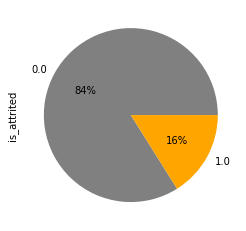

In [ ]:
y_train.value_counts().plot(kind='pie', label= 'is_attrited', autopct='%.0f%%', colors = ['Gray', 'Orange'])

Melihat data yang akan dilatih tidak seimbang, mana dilakukan _balancing_ data

In [ ]:
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 8500, 1.0: 1627})
Resampled dataset shape Counter({0.0: 8500, 1.0: 8500})


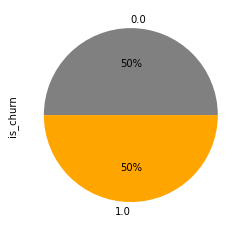

In [ ]:
y_res.value_counts().plot(kind='pie', label= 'is_churn', autopct='%.0f%%', colors = ['Gray', 'Orange'])

In [ ]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17000 non-null  float64
 1   dependent_count          17000 non-null  float64
 2   product_count            17000 non-null  float64
 3   months_total             17000 non-null  float64
 4   inactive_total           17000 non-null  float64
 5   contacted_total          17000 non-null  float64
 6   credit_limit             17000 non-null  float64
 7   transaction_count        17000 non-null  float64
 8   transaction_frequency    17000 non-null  float64
 9   utilization_ratio        17000 non-null  float64
 10  gender_F                 17000 non-null  float64
 11  gender_M                 17000 non-null  float64
 12  income_$120K +           17000 non-null  float64
 13  income_$40K - $60K       17000 non-null  float64
 14  income_$60K - $80K    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
X_train.sample(10)

,age,dependent_count,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,...,education_Doctorate,education_Graduate,education_High School,education_Post-Graduate,education_Uneducated,education_Unknown,marital_Divorced,marital_Married,marital_Single,marital_Unknown
3569,0.085106,0.000000,0.200000,0.279070,0.500000,0.166667,0.547066,0.841438,0.837209,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
7426,0.170213,0.400000,0.800000,0.209302,0.333333,0.000000,0.007761,0.244520,0.627907,0.449449,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
11030,0.337436,0.674762,0.200000,0.429678,0.291269,0.542064,0.045736,0.059708,0.180103,0.844454,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
12265,0.499705,0.611419,0.022838,0.550173,0.500000,0.333333,0.765621,0.069069,0.190472,0.002515,...,0.0,0.057094,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000
12617,0.240210,0.251596,0.303191,0.468889,0.457004,0.500000,0.144503,0.294830,0.348074,0.289425,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.257978,0.0,0.0,0.742022
15920,0.479038,0.551480,0.648520,0.551809,0.373766,0.373766,0.025482,0.119613,0.250172,0.000000,...,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
14796,0.673045,0.112230,1.000000,0.798059,0.520384,0.500000,0.047394,0.064316,0.151470,0.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
5,0.425532,0.600000,0.600000,0.627907,0.500000,0.500000,0.544769,0.039335,0.131783,0.074074,...,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
15017,0.563611,0.302059,0.502059,0.617955,0.418383,0.418383,0.310104,0.076767,0.259610,0.110845,...,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
15562,0.357633,0.400000,0.388447,0.492402,0.490372,0.500000,0.033361,0.099324,0.316038,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.000000


## Data Modeling df_case2

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier


model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Classifier':RidgeClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=42),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=42),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'Catboost Classifier':CatBoostClassifier(random_state=42, silent=True),
}

In [ ]:
# Import seluruh metrics akurasi

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer


In [ ]:
# Membuat function untuk menampilkan semua model yang dibandingkan 
# beserta nilai akurasi metriknya (accuracy, precision, recall, f1, roc_auc)

def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train, y_train)
  y_pred_list[name] = model.predict(X_test)

score = get_score(y_pred_list, y_test, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.843529,0.844049,0.843657,0.843499,0.843657
Ridge Classifier,0.842588,0.844765,0.842850,0.842405,0.842850
KNN,0.826353,0.853196,0.827260,0.823262,0.827260
SVC,0.892706,0.894335,0.892921,0.892629,0.892921
Neural Network,0.931294,0.931902,0.931424,0.931281,0.931424
Decision Tree,0.928941,0.928981,0.928981,0.928941,0.928981
Gradient Boosting Classifier,0.960471,0.960542,0.960522,0.960471,0.960522
AdaBoost Classifier,0.947529,0.947821,0.947622,0.947526,0.947622
Hist Gradient Boosting,0.973412,0.973406,0.973421,0.973411,0.973421


##Data Modeling: CatBoostClasifier
Didapatkan bahwa akurasi paling tinggi diraih oleh metode Catboost Classifier. Sehingga untuk langkah selanjutnya, digunakan metode tersebut untuk diketahui fitur apa saja yang paling berpengaruh terhadap berhentinya customer dalam menggunakan layanan.

In [ ]:
from catboost import CatBoostClassifier
catBoostModel = CatBoostClassifier(random_state=42)
catBoostModel.fit(X_train, y_train)
catBoostModel.score(X_test, y_test)

Learning rate set to 0.030548
0:	learn: 0.6611047	total: 16.7ms	remaining: 16.7s
1:	learn: 0.6281446	total: 27ms	remaining: 13.5s
2:	learn: 0.5946954	total: 37.3ms	remaining: 12.4s
3:	learn: 0.5690630	total: 47.6ms	remaining: 11.9s
4:	learn: 0.5474964	total: 58.4ms	remaining: 11.6s
5:	learn: 0.5236472	total: 68.4ms	remaining: 11.3s
6:	learn: 0.4990716	total: 78.4ms	remaining: 11.1s
7:	learn: 0.4795855	total: 89ms	remaining: 11s
8:	learn: 0.4653228	total: 108ms	remaining: 11.9s
9:	learn: 0.4481351	total: 120ms	remaining: 11.8s
10:	learn: 0.4334865	total: 130ms	remaining: 11.7s
11:	learn: 0.4194263	total: 140ms	remaining: 11.5s
12:	learn: 0.4038073	total: 151ms	remaining: 11.4s
13:	learn: 0.3903980	total: 161ms	remaining: 11.4s
14:	learn: 0.3785661	total: 171ms	remaining: 11.2s
15:	learn: 0.3671619	total: 181ms	remaining: 11.2s
16:	learn: 0.3596982	total: 192ms	remaining: 11.1s
17:	learn: 0.3515594	total: 207ms	remaining: 11.3s
18:	learn: 0.3419324	total: 217ms	remaining: 11.2s
19:	learn

0.9755294117647059

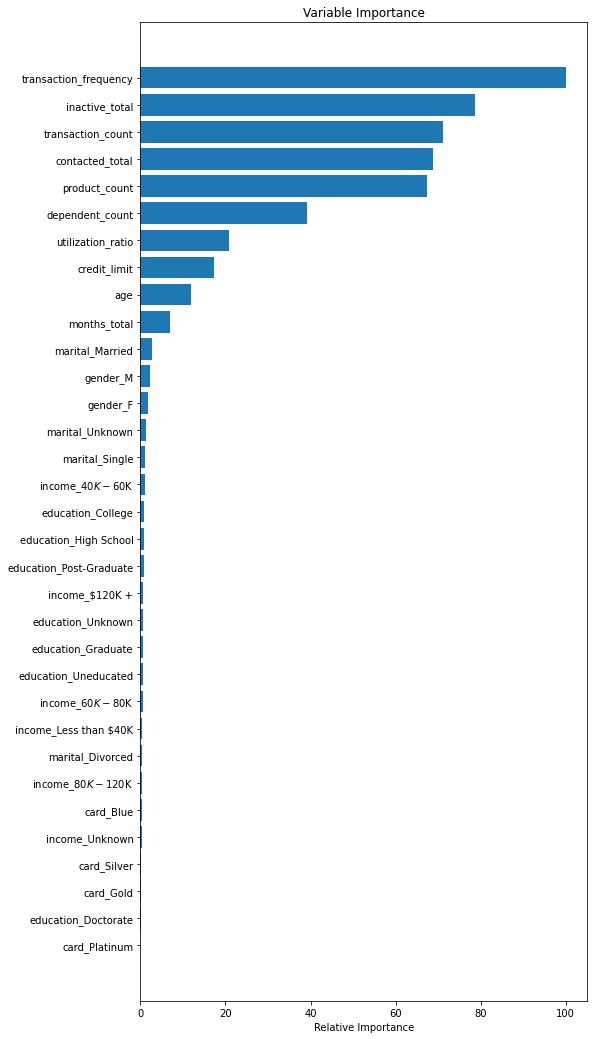

In [ ]:
# Mencari feature importance (fitur yang paling berpengaruh terhadap model)
feature_importance = catBoostModel.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Di sini, didapatkan bahwa lima fitur yang paling berpengaruh adalah `transaction_frequency`, `inactive_total`, `transaction_count`, `contacted_total`, dan `product_count`. Dari kelima fitur ini, dicari kaitannya satu sama lain dengan berhentinya seorang customer berhenti menggunakan layanan

#Exploratory Data Analysis (EDA)

##EDA pada df_case1
Didapatkan kasus "Apa saja faktor yang berpengaruh terlambatnya pembayaran tunggakan?", di sini didefinisikan bahwa tunggakan yang tidak baik atau terlambat adalah yang memiliki `utilization_ratio` di atas 30%. Sehingga

In [ ]:
df_case1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3874 entries, 1 to 10124
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3874 non-null   int64  
 1   gender                 3874 non-null   object 
 2   income                 3874 non-null   object 
 3   card                   3874 non-null   object 
 4   marital                3874 non-null   object 
 5   product_count          3874 non-null   int64  
 6   months_total           3874 non-null   int64  
 7   inactive_total         3874 non-null   int64  
 8   contacted_total        3874 non-null   int64  
 9   credit_limit           3874 non-null   float64
 10  transaction_count      3874 non-null   int64  
 11  transaction_frequency  3874 non-null   int64  
 12  utilization_ratio      3874 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 423.7+ KB


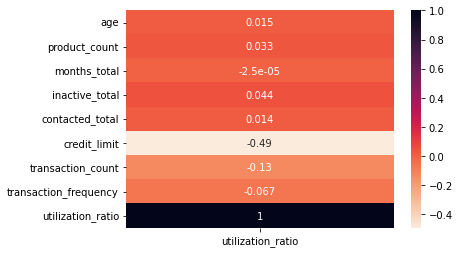

In [ ]:
df_corr = df_case1.corr()[['utilization_ratio']]
dataplot = sns.heatmap(df_corr, cmap="rocket_r", annot=True)

Dari korelasi di atas, dapat dilihat bahwa ada tiga fitur yang memiliki pengaruh paling tinggi terhadap rasio penggunaan kartu kredit, antara lain
- `credit_limit`: Berbanding negatif (Semakin tinggi limitnya, semakin rendah rasio penggunaannya)
- `transaction_count`: Berbanding negatif (Semakin banyak  jumlah transaksi yang dilakukan, semakin rendah pula rasio penggunaannya).
- `transaction_frequency`: Berbanding negatif (Semakin banyak frekuensi transaksinya, semakin rendah pula rasio penggunaannya)
<br>
Adapun untuk fitur count dan frequency merupakan fitur yang masih berhubungan, sehingga masuk akal apabil arah hubungan antara rasio dan keduanya memiliki arah yang sama (negatif)

Di sisi lain, pada `inactive_total`, dapat diambil kesimpulan bahwa rata-rata orang yang memiliki `utilization_ratio` yang lebih tinggi memiliki kemungkinnan lebih banyak untuk tidak aktif dalam penggunaan kartu kredit. Hal ini dapat dilihat di mana korelasi antarkedua fitur memiliki hubungan yang positif. Hal ini dapat dikaitkan pula terhadap penggunaan produk yang dipegang oleh customer tersebut melalui `product_count`, di mana memiliki hubungan positif pula dengan `utilization_ratio`. 

Untuk menelusuri lebih lanjut terkait batas kredit, dilakukan EDA kembali. Agar penggambaran lebih jelas, maka dilakukan pembulatan untuk `utilization_ratio`

In [ ]:
df_case1['utilization_ratio'] = df_case1['utilization_ratio'].apply(lambda x: round(x, 1))
df_case1.sample(5)

,age,gender,income,card,marital,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio
7927,40,M,$40K - $60K,Blue,Divorced,3,35,1,1,2430.0,4344,75,0.4
3304,38,M,$40K - $60K,Blue,Married,4,25,1,4,3735.0,1573,35,0.3
8990,44,F,$40K - $60K,Blue,Married,4,31,3,5,1691.0,2345,33,0.8
486,52,F,Less than $40K,Blue,Married,4,41,2,2,5616.0,3410,62,0.4
3911,40,F,Less than $40K,Blue,Married,6,30,3,2,3125.0,4372,68,0.7


In [ ]:
#Dalam SQL, dibuat dahulu tabel VIEW untuk memudahkan EDA
# CREATE VIEW view_df_case1_EDA1 AS 
# SELECT credit_limit, income_category income, total_trans_amt transaction_count, total_trans_ct transaction_frequency, round(avg_utilization_ratio, 1) utilization_ratio 
# FROM customer_data_history
# WHERE avg_utilization_ratio > 0.30

### Mencari Tahu Penghasilan Kebanyakan Pengguna yang Memiliki Rasio Penggunaan Kredit yang Tinggi
Hal ini diperlukan untuk mengetahui daya beli dari pengguna.

In [ ]:
#Dalam Python
df_case1.groupby(['utilization_ratio'])['income'].agg(pd.Series.mode)

utilization_ratio
0.3    Less than $40K
0.4    Less than $40K
0.5    Less than $40K
0.6    Less than $40K
0.7    Less than $40K
0.8    Less than $40K
0.9    Less than $40K
1.0    Less than $40K
Name: income, dtype: object

In [ ]:
#Dalam SQL
# CREATE VIEW view_df_case1_income_mode AS(
# 	WITH look_for_mode AS(
#     		SELECT 
#         		utilization_ratio, 
#         		income, 
#         		COUNT(income) AS frequency,
#         		RANK() OVER (PARTITION BY utilization_ratio ORDER BY COUNT(income) DESC) As rank_num
#         		FROM view_df_case1_eda1
#         		GROUP BY utilization_ratio, income
# 	)
# 	SELECT 
#     	utilization_ratio, 
#     	income
#     	FROM look_for_mode
#     	WHERE rank_num = 1
# )

Didapatkan pada masing-masing rasio penggunaan,  pendapatan mayoritas pengguna yang memiliki rasio penggunaan di atas 0,3 adalah di bawah $40K, yang mana hal ini tidak menutup kemungkinan bahwa pendapatan jauh ada di bawah batas kredit (credit_limit). Sehingga, menyebabkan ketidakmampuan pengguna untuk membayar tunggakan secara berketerusan.

### Pengelompokan Berdasarkan Credit Limit Pengguna


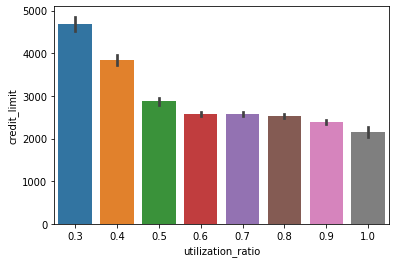

In [ ]:
sns.barplot(data=df_case1, x="utilization_ratio", y="credit_limit")

In [ ]:
#Dalam SQL
# CREATE VIEW view_df_case1_avg_credit_limit AS
# SELECT utilization_ratio, AVG(credit_limit) avg_credit_limit 
# FROM view_df_case1_eda1
# GROUP BY utilization_ratio
# ORDER BY utilization_ratio ASC;

Di sini, didapatkan ada pola di mana semakin tingginya `utilization_ratio`, semakin rendah pula `credit_limit`-nya. Sehingga, didapatkan secara garis besar kalau mayoritas pengguna yang memiliki nilai penggunaan kredit tinggi (sering terlambat) memiliki batas `credit_limit` yang rendah pula.

###Pengelompokan Berdasarkan Transacation Count (Jumlah Transaksi)

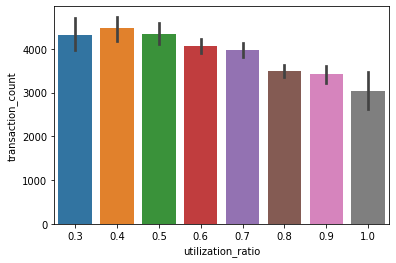

In [ ]:
sns.barplot(data=df_case1, x="utilization_ratio", y="transaction_count")

In [ ]:
#Dalam SQL
# REATE VIEW view_df_case1_avg_tran_count AS
# SELECT utilization_ratio, AVG(transaction_count) avg_transaction_count 
# FROM view_df_case1_eda1
# GROUP BY utilization_ratio  
# ORDER BY `view_df_case1_eda1`.`utilization_ratio` ASC;

Di sini, didapatkan bahwa ada kecendurungan bahwa semakin tinggi `utilization_ratio` maka cenderung rendah pula jumlah transaksi `transaction_count` yang dilakukan pengguna. Hal ini mungkin ada hubungannya dengan batas `credit_limit` yang dipaparkan sebelumnya.

###Pengelompokan Berdasarkan Transacation Frequency (Frekuensi Transaksi)

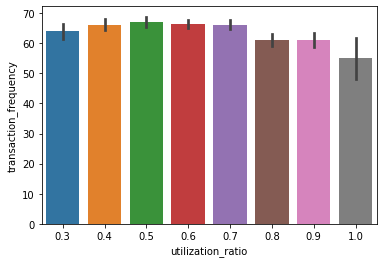

In [ ]:
sns.barplot(data=df_case1, x="utilization_ratio", y="transaction_frequency")

In [ ]:
#Dalam SQL
# CREATE VIEW view_df_case1_avg_tran_freq AS
# SELECT utilization_ratio, AVG(transaction_frequency) avg_transaction_frequency
# FROM view_df_case1_eda1
# GROUP BY utilization_ratio  
# ORDER BY `view_df_case1_eda1`.`utilization_ratio` ASC

Di sini, didapatkan bahwa ada kecendurungan bahwa semakin tinggi `utilization_ratio` maka cenderung rendah pula jumlah transaksi `transaction_frequency` yang dilakukan pengguna. Hal ini mungkin ada hubungannya dengan batas `credit_limit` dan `transaction_count` yang dipaparkan sebelumnya.

##EDA pada df_case2
Dari hasil Data Modeling, diambil `transaction_frequency`, `inactive_total`, `transaction_count`, `contacted_total`, dan `product_count`. Untuk analisis data lebih mendalam. Menggunakan data yang belum diseimbangkan untuk menjaga hasil insight yang akan didapatkan melalui EDA.

In [ ]:
df_case2 = df_merged
df_case2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10127 non-null  int64  
 1   gender                 10127 non-null  object 
 2   dependent_count        10127 non-null  int64  
 3   income                 10127 non-null  object 
 4   card                   10127 non-null  object 
 5   education              10127 non-null  object 
 6   marital                10127 non-null  object 
 7   product_count          10127 non-null  int64  
 8   months_total           10127 non-null  int64  
 9   inactive_total         10127 non-null  int64  
 10  contacted_total        10127 non-null  int64  
 11  credit_limit           10127 non-null  float64
 12  transaction_count      10127 non-null  int64  
 13  transaction_frequency  10127 non-null  int64  
 14  utilization_ratio      10127 non-null  float64
 15  is

In [ ]:
df_case2.sample(10)

,age,gender,dependent_count,income,card,education,marital,product_count,months_total,inactive_total,contacted_total,credit_limit,transaction_count,transaction_frequency,utilization_ratio,is_attrited
4432,48,M,2,$40K - $60K,Blue,Unknown,Unknown,5,43,2,2,1761.0,4410,73,0.709,0
5563,53,M,3,$120K +,Blue,Graduate,Single,4,45,3,1,3378.0,4437,50,0.548,0
2262,50,F,2,Unknown,Blue,Uneducated,Married,6,44,2,5,16763.0,3626,69,0.000,0
9624,50,F,4,Less than $40K,Blue,Graduate,Single,1,37,2,3,3699.0,7297,71,0.247,1
4969,52,F,4,Unknown,Blue,High School,Single,5,36,3,3,9078.0,4458,87,0.132,0
1364,49,M,2,$80K - $120K,Blue,Graduate,Married,4,36,2,2,20533.0,3918,78,0.064,0
2235,60,F,0,Less than $40K,Blue,Uneducated,Married,3,49,1,2,3955.0,1560,43,0.506,0
4483,46,M,3,$80K - $120K,Blue,College,Unknown,4,36,2,2,24869.0,1409,36,0.070,0
9847,46,F,3,$40K - $60K,Blue,Unknown,Single,4,39,3,3,9110.0,5290,69,0.276,1
7473,57,F,3,Less than $40K,Blue,College,Single,5,51,1,0,2894.0,5405,87,0.000,0


###Pengelompokan Berdasarkan Keaktifan Pengguna

Adapun pengelompokan dan data yang digunakan merujuk pada tahap Data Modeling yang mencari korelasi antar fitur `is_attrited` dengan fitur yang memiliki hubungan paling jauh.

In [ ]:
df_case2.groupby("is_attrited").mean()[['transaction_frequency','inactive_total','transaction_count','contacted_total','product_count']]

,transaction_frequency,inactive_total,transaction_count,contacted_total,product_count
is_attrited,,,,,
0,68.672588,2.273765,4654.655882,2.356353,3.914588
1,44.933620,2.693301,3095.025814,2.972342,3.279656


In [ ]:
#Dalam SQL
# CREATE VIEW view_df_case2_EDA1 AS 
# SELECT status is_attrited, AVG(total_trans_ct) transaction_frequency, AVG(months_inactive_12_mon) inactive_total, AVG(total_trans_amt) transaction_count, AVG(contacts_count_12_mon) contacted_total, AVG(total_relationship_count) product_count
# FROM customer_data_history, status_db
# WHERE customer_data_history.idstatus = status_db.id
# GROUP BY status_db.status;

Di sini, dapat dilihat bahwa adanya kecendurungan bagi customer yang berhenti menggunakan layanan untuk lebih sedikit melakukan transaksi yang dapat dilihat dalam `transaction_frequency`. <br>Di sisi yang sama, hal ini juga ditunjukkan rerata `inactive_total` yang lebih tinggi dibandingkan customer yang tidak berhenti. Di mana hal ini menandakan kemungkinan bahwa orang tersebut berhenti menggunakan layanan karena sudah tidak memerlukan layanan kartu kredit. <br>
Lalu melalui `contacted_total`, dapat dilihat jika adanya usaha dari pihak bank untuk membuat customer ini kembali menggunakan layanan atau membayar `resolve_balance` yang masih ada dalam akun customer. <br>
Dapat dilihat pula bahwa customer yang masih menggunakan layanan cenderung sedang memegang produk dalam `product_count` lebih banyak dibandingkan yang berhenti menggunakan layanan.

# Arahan Bisnis dan Kesimpulan
 Di sini, ada beberapa poin yang dapat diambil dari tujuan bisnis (Mengidentifikasi faktor apa saja yang menjadi penyebab customer terlambat membayar tunggakan kredit dan mengidentifikasi faktor penyebab customer berhenti menggunakan layanan.

## Penyebab Customer Terlambat Membayar Tunggakan Kredit
Di sini, sebagian besar pengguna yang terlambat membayar tunggakan adalah pengguna yang memiliki `credit_limit` yang rendah. Akan tetapi hal ini tidak dapat dikatakan sebagai faktor utama penyebab dari keterlambatan ini. Maka dari itu, dapat dikaitkan dengan EDA terkait pendapatan sebagian besar pengguna atau `customer` yang masih mungkin jauh di bawah daya bayar kredit. Pendapatan yang berada di bawah tunggakan kredit bulanan secara terus-menerus, menyebabkan ketidakmampuan pengguna untuk membayar tunggakan kredit secara berkelanjutan.


## Strategi Menghadapi Customer yang Terlambat Membayar Tunggakan Kredit

### Antisipasi
1) Dalam memulai layanan, akan ada baiknya untuk memberi tahu risiko dan kesepakatan pembayaran pada awal pembukaan layanan. Hal ini agar customer mengerti hal apa saja yang akan dihadapi serta didapatkan melalui layanan kredit ini.<br>
2) Sebelum membuka layanan dengan persetujuan customer, ada baiknya untuk melihat riwayat kredit pengguna terdahulu dan potensial dari pengguna. Agar tidak terjadi adanya hambatan dalam pembayaran tagihan.

### Menghadapi Kasus yang Sudah Terjadi
1) Dalam menghadapinya, usahakan adanya _reconditioning_ pada pengontakan dengan niat untuk membantu customer. _reconditioning_ ini dapat berupa **meningkatkan batas kredit** atau **penurunan bunga pembayaran** apabila dalam usaha pengguna masih memiliki potensial.<br>
2) **Memberikan tambahan kredit atas aset** yang dimiliki oleh customer, selain membantu dalam pelunasann tunggakan, hal ini dapat membantu atas terbatasnya modal yang dimiliki oleh customer.

## Penyebab Customer Berhenti Menggunakan Layanan Kredit

Atas dasar EDA yang dilakukan, dapat disimpulkan bahwa customer yang berhenti menggunakan layanan merupakan seseorang atau perusahaan yang sudah tidak membutuhkan layanan kredit. Hal ini dapat dilihat melalui jumlah transaksi dan frekuensinya yang secara rata-rata tidak sebanyak pengguna atau customer yang masih menggunakan kartu kredit hingga saat ini.

## Strategi Mencegah Seorang Customer Menggunakan Layanan Kredit


Perlu dilihat bahwa mayoritas pengguna atau customer yang berhenti menggunakan layanan adalah pribadi yang sudah tidak membutuhkan atau memerlukan layanan kredit.<br>

### Antisipasi
1) **_Rewarding_** bagi pengguna kredit yang sudah lama menggunakan layanan, hal ini ditujukan agar para pengguna berpikir dua kali sebelum benar-benar berhenti menggunakan layanan. Adapun _reward_ ini berupa peringanan bunga tunggakan ataupun produk berkaitan yang lainnya.<Br>
2) Melakukan **pengamatan** lebih jauh terkait penggunaan kredit bagi customer sehingga layanan menjadi lebih tepat dan sesuai bagi kebutuhan pengguna. 

### Menghadapi Kasus yang Sudah Terjadi
1) Dalam menghadapinya, **sebuah _campaign_** agar pengguna kembali menggunakan layanan dapat dilakukan. Adapun bentuknya dapat berupa penambahan produk dalam layanan dan dapat digunakan pula untuk strategi _upselling_ layanan kredit tersebut.<br>
2) **Memberikan informasi secara berkala** pada beberapa akun yang masih memiliki potensi menggunakan layanan kembali. <br>
3) **Membuka layanan kritik & saran**, karena ada kemungkinan bahwa seoarang customer terkendala dalam menggunakan layanan baik dapat berupa gagal bayar maupun pelayanan dari staf perbankan yang kurang baik dalam memberikan layanan. Hal ini dikarenakan sebab-sebab tersebut masih mungkin mengakibatkan berhentinya penggunaan layanan kredit pada customer.